# Analiza danych Wielowymiarowych

### Wektor losowy i wielowymiarowy rozkład prawdopodobieństwa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# generowanie przykłądowych danych wielowymiarowych
np.random.seed(42)
num_samples = 100

In [7]:
# zmienna X1: wiek
X1 = np.random.normal(loc=30, scale=5, size=num_samples)


In [8]:
# Zmienna X2: Liczba godzin pracy (pozytywnie skorelowana z wiekiem)
X2 = X1 * 0.8 + np.random.normal(loc=10, scale=2, size=num_samples)

In [9]:
# Zmienna X3: Satysfakcja (negatywnie skorelowana z X2, z szumem)
X3 = 100 - X2 * 1.5 + np.random.normal(loc=0, scale=10, size=num_samples)

In [11]:
data_multi = pd.DataFrame({
    "Wiek": X1,
    "Godziny Pracy": X2,
    "Satysfakcja": X3
})

In [12]:
print("Przykładowe dane:")
print(data_multi)

Przykładowe dane:
         Wiek  Godziny Pracy  Satysfakcja
0   32.483571      33.156115    53.843701
1   29.308678      32.605652    56.699367
2   33.238443      35.905325    56.972525
3   37.615149      38.487565    52.806673
4   28.829233      32.740815    37.112084
..        ...            ...          ...
95  22.682425      28.916575    49.696042
96  31.480601      33.416766    58.870849
97  31.305276      35.351671    50.045488
98  30.025567      34.136871    56.923314
99  28.827064      30.775711    60.132722

[100 rows x 3 columns]


In [13]:
# Obliczenie macierzy kowariancji
cov_matrix = data_multi.cov()
print(" Macierz Kowariancji")
print(cov_matrix)

 Macierz Kowariancji
                    Wiek  Godziny Pracy  Satysfakcja
Wiek           20.619247      15.313856   -13.574671
Godziny Pracy  15.313856      14.943789   -15.656373
Satysfakcja   -13.574671     -15.656373   130.912529


In [14]:
# obliczenie macierzy korelacji
corr_matrix = data_multi.corr()
print("Macierz Korelacji")
print(corr_matrix)

Macierz Korelacji
                   Wiek  Godziny Pracy  Satysfakcja
Wiek           1.000000       0.872404    -0.261278
Godziny Pracy  0.872404       1.000000    -0.353973
Satysfakcja   -0.261278      -0.353973     1.000000


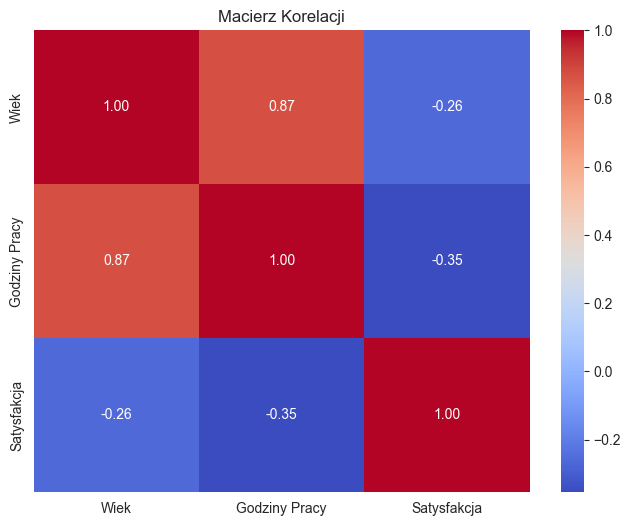

In [15]:
# wizualizacja macierzy korelacji (heatmapa)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz Korelacji")
plt.show()

## Wielowymiarowy rozkład normalny

In [17]:
from scipy.stats import multivariate_normal

In [18]:
#Definiowanie Parametrów wielowymiarowego rozkłądu normalnego
mean_vec = np.array([0, 0])  # Wektor średnich dla X i Y
cov_matrix_mv = np.array([[1, 0.8], [0.8, 1]])  # Macierz kowariancji

In [19]:
# tworzenie obiektu rozkładu
multi_norm_dist = multivariate_normal(mean=mean_vec, cov=cov_matrix_mv)

In [20]:
# generowanie próbek rozkłądu
samples = multi_norm_dist.rvs(size=500)

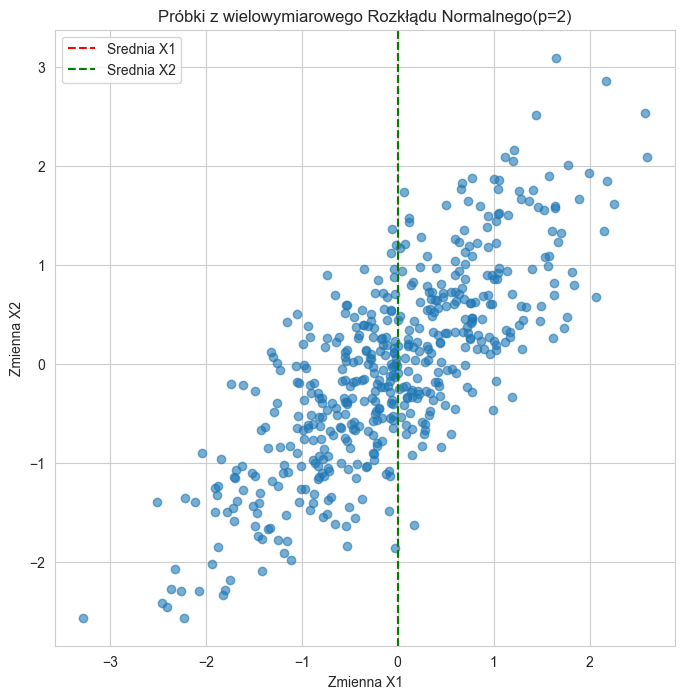

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
plt.title("Próbki z wielowymiarowego Rozkłądu Normalnego(p=2)")
plt.xlabel("Zmienna X1")
plt.ylabel("Zmienna X2")
plt.grid(True)
plt.axvline(mean_vec[0], color="red", linestyle='--', label="Srednia X1")
plt.axvline(mean_vec[1], color="green", linestyle='--', label="Srednia X2")
plt.legend()
plt.show()

In [23]:
# inny przykład z mniejszą korelacją
cov_matrix_mv_low_corr = np.array([[1, 0.2], [0.2, 1]])

In [24]:
multi_norm_dist_low_corr = multivariate_normal(mean=mean_vec, cov=cov_matrix_mv_low_corr)

In [25]:
samples_low_corr = multi_norm_dist_low_corr.rvs(size=500)

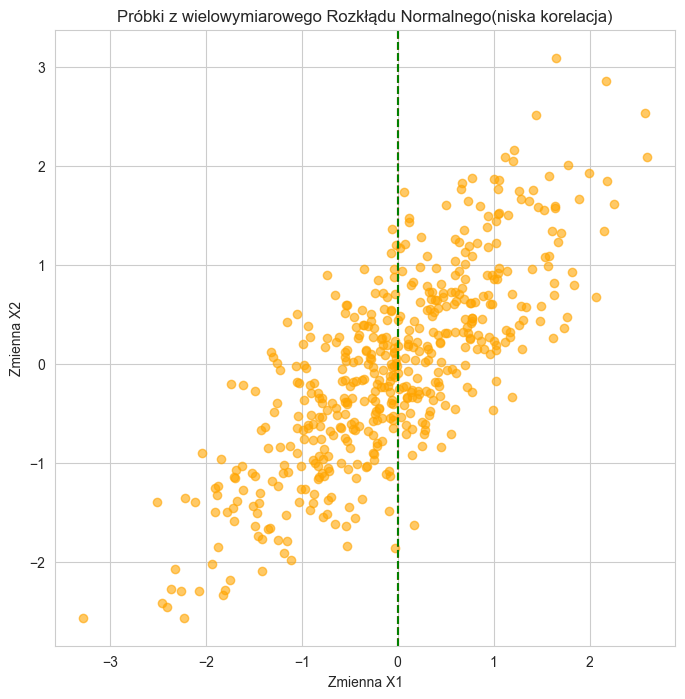

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, color="orange")
plt.title("Próbki z wielowymiarowego Rozkłądu Normalnego(niska korelacja)")
plt.xlabel("Zmienna X1")
plt.ylabel("Zmienna X2")
plt.grid(True)
plt.axvline(mean_vec[0], color="red", linestyle='--')
plt.axvline(mean_vec[1], color="green", linestyle='--')
plt.show()